<https://compneuro.neuromatch.io/tutorials/W0D2_PythonWorkshop2/student/W0D2_Tutorial1.html>

# Lesson 1

## LIF Model

### The leaky-integrate-and-fire (LIF) neuron

The membrane equation describes the time evolution of the membrane potential $V(t)$ in response to synaptic input and the leakage of charge across the cell membrane. This type of phenomenon occurs in nature and is mathematically described by an ordinary differential equation (ODE), a concept we will explore further in the coming days.

The neuron's membrane potential $V(t)$ increases with incoming current $I(t)$. When $V(t)$ reaches a certain threshold $ V_th $, the neuron 'fires', which means it generates a spike and the membrane potential is reset to $V_{reset}$.


$$ \tau_m \frac{d}{dt} V(t) = E_L - V(t) + R \; I(t) \;\;,\textbf{if}\;\; V(t) \leq V_{th}$$

$$ V(t) = V_{reset} \;\;\textbf{otherwise}$$

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. We can also write $V_m$ for membrane potential, which is more convenient for plot labels.



Integrate the potential:
$$ \tau_m \frac{V(t + \Delta t)-V(t)}{\Delta t}  = E_L - V(t) + R \; I(t) = K(t)$$

then,

$$ V(t + \Delta t) = V(t) +\Delta t \frac{K(t)}{\tau_m}$$ 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
E_L = -60e-3      # milivolt
V_r = -70e-3      # milivolt
V_th = -50e-3     # milivolt
R = 100e6        # ohm
i_mean = 25e-11  # ampere

In [21]:
i_mean = 25e-11
def generate_time_array(t_init=0,tmax=150e-3,dt=1e-3):
    return np.arange(t_init, tmax, dt)

def sinusoidal_current(time_array, i_mean):
    constant = 2 * (np.pi / 0.01)
    
    # Adding Gaussian noise with mean 0 and standard deviation 0.1 times the mean value
    noise = np.random.normal(0, 0.2 * i_mean, time_array.shape)
    
    return i_mean * (1 + np.sin(constant * time_array))+noise

def potential(time_array,current,tau,E_L,R,V_th,V_r,dt):
    V_t = np.zeros(time_array.shape[0])
    V_t[0] = E_L
    
    for i in range(1,V_t.shape[0]):
        V_t[i] = V_t[i-1] + dt*(E_L-V_t[i-1] + R*current[i-1])/tau
        
        if V_t[i] > V_th:
            V_t[i] = V_r
        
    return V_t

In [22]:
time_array = generate_time_array()

neuro_current = sinusoidal_current(time_array,i_mean)

V_t = potential(time_array,neuro_current,tau,E_L,R,V_th,V_r,dt)


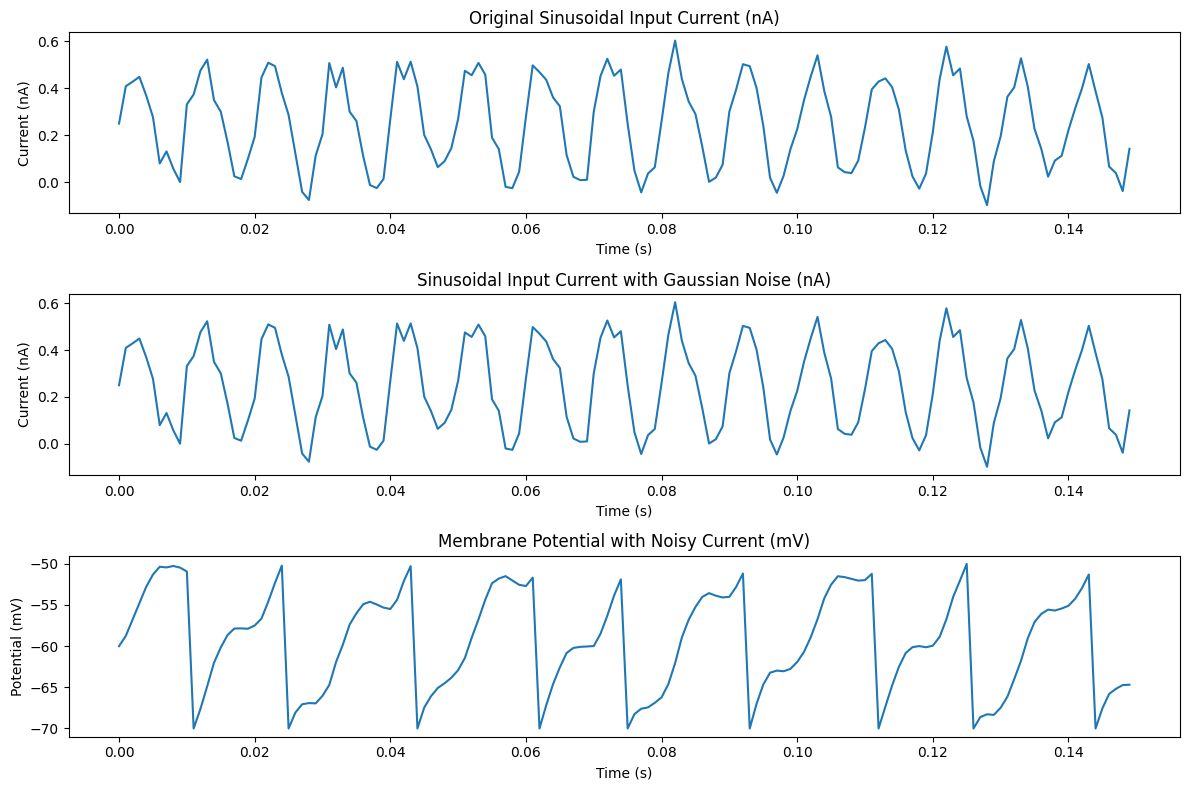

In [23]:
# Plot the results with noise
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time_array, neuro_current * 1e9)  # Plot the original current for comparison
plt.title('Original Sinusoidal Input Current (nA)')
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.subplot(3, 1, 2)
plt.plot(time_array, neuro_current * 1e9)  # Convert amperes to nanoamperes for plotting
plt.title('Sinusoidal Input Current with Gaussian Noise (nA)')
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.subplot(3, 1, 3)
plt.plot(time_array, V_t * 1e3)  # Convert volts to millivolts for plotting
plt.title('Membrane Potential with Noisy Current (mV)')
plt.xlabel('Time (s)')
plt.ylabel('Potential (mV)')

plt.tight_layout()
plt.show()

## The LIF Neuron Class

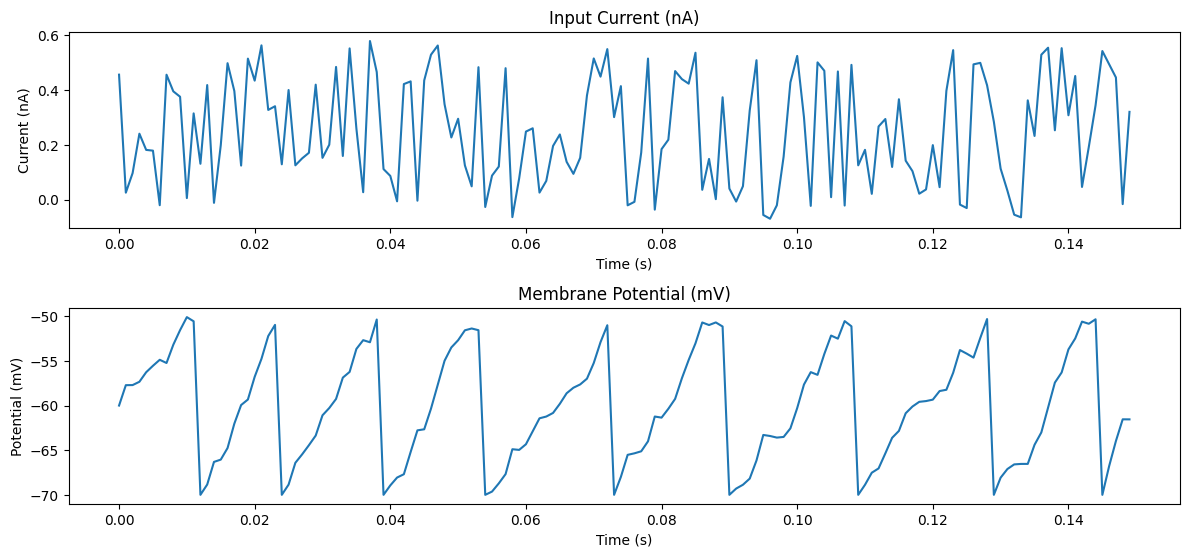

In [31]:
class LIF_Neuron:
    def __init__(self, tau, E_L, V_r, V_th, R, i_mean, dt, t_max):
        self.tau = tau
        self.E_L = E_L
        self.V_r = V_r
        self.V_th = V_th
        self.R = R
        self.i_mean = i_mean
        self.dt = dt
        self.t_max = t_max
        self.time_array = np.arange(0, self.t_max, self.dt)
        self.V_t = np.zeros(self.time_array.shape[0])
        self.V_t[0] = self.E_L  # Initialize with resting potential
        
    def sinusoidal_current(self):
        constant = 2 * (np.pi / 0.01)
        noise = np.random.normal(0, 0.1 * self.i_mean, self.time_array.shape)
        current = self.i_mean * (1 + np.sin(constant * self.time_array)) + noise
        return current
    
    def random_current(self):
        np.random.seed(2)
        constant = 0.1*np.sqrt(self.t_max/self.dt)
        uniform = np.random.uniform(-1,1,size=time_array.shape)
        noise = np.random.normal(0, 0.1 * self.i_mean, self.time_array.shape)
        current = self.i_mean * (1 + constant*uniform) + noise
        return current

    def update_potential(self, current):
        
        for i in range(1, self.V_t.shape[0]):
            self.V_t[i] = self.V_t[i-1] + self.dt * (self.E_L - self.V_t[i-1] + self.R * current[i-1]) / self.tau
            if self.V_t[i] >= self.V_th:
                self.V_t[i] = self.V_r
        return self.V_t
    
    def plot_results(self, current):
        plt.figure(figsize=(12, 8))
        plt.subplot(3, 1, 1)
        plt.plot(self.time_array, current * 1e9)  # Convert to nanoamperes
        plt.title('Input Current (nA)')
        plt.xlabel('Time (s)')
        plt.ylabel('Current (nA)')

        plt.subplot(3, 1, 2)
        plt.plot(self.time_array, self.V_t * 1e3)  # Convert to millivolts
        plt.title('Membrane Potential (mV)')
        plt.xlabel('Time (s)')
        plt.ylabel('Potential (mV)')

        plt.tight_layout()
        plt.show()

# Parameters
tau = 20e-3      # second
E_L = -60e-3     # millivolt
V_r = -70e-3     # millivolt
V_th = -50e-3    # millivolt
R = 100e6        # ohm
i_mean = 25e-11  # ampere
dt = 1e-3        # second
t_max = 150e-3   # second

# Create a Neuron instance
neuron = LIF_Neuron(tau, E_L, V_r, V_th, R, i_mean, dt, t_max)

# Generate current and update potential
current = neuron.random_current()
neuron.update_potential(current)

# Plot the results
neuron.plot_results(current)
